# Using elliptic curves and isogenies in Sage

## Finite fields

We create finite fields by passing their cardinality

In [5]:
Fp = GF(11)

In [6]:
Fp

Finite Field of size 11

In [7]:
Fq = GF(11^2)
Fq

Finite Field in z2 of size 11^2

For extension fields, the generator is obtained with the `.gen()` function.

In [8]:
z = Fq.gen()
z

z2

In [9]:
z^120

1

Same thing in one go

In [10]:
K.<t> = GF(next_prime(2^128)^2)
K

Finite Field in t of size 340282366920938463463374607431768211507^2

## Elliptic curves

Curves over $ℚ$

In [11]:
E = EllipticCurve([-10,10])
E

Elliptic Curve defined by y^2 = x^3 - 10*x + 10 over Rational Field

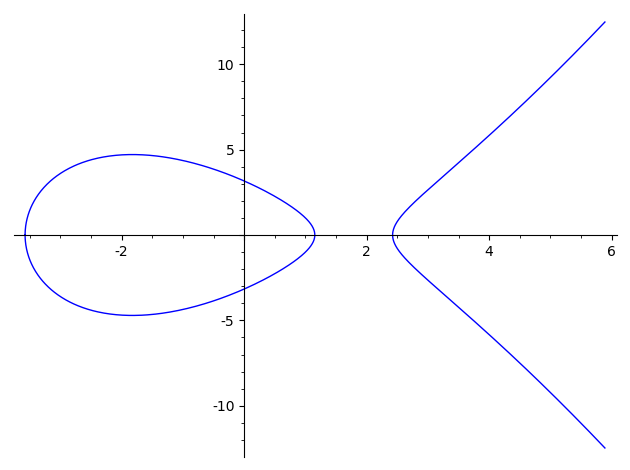

In [12]:
E.plot()

Cuvers over other fields

In [13]:
F = EllipticCurve(GF(11), [1, 0])
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [14]:
F.order()

12

In [15]:
F.cardinality()

12

In [16]:
F.points()

[(0 : 0 : 1), (0 : 1 : 0), (5 : 3 : 1), (5 : 8 : 1), (7 : 3 : 1), (7 : 8 : 1), (8 : 5 : 1), (8 : 6 : 1), (9 : 1 : 1), (9 : 10 : 1), (10 : 3 : 1), (10 : 8 : 1)]

In [62]:
P = F.random_point()
P

(0 : 0 : 1)

In [19]:
P.order()

4

Group structure

In [63]:
F.abelian_group()

Additive abelian group isomorphic to Z/12 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [61]:
g = F.gens()[0]
g

(7 : 8 : 1)

In [28]:
g.order()

12

Construct an isogeny with given kernel

In [30]:
origin = 6*g
origin

(0 : 0 : 1)

In [32]:
F.point([0,0])

(0 : 0 : 1)

In [33]:
I = F.isogeny(origin)
I

Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11 to Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 11

In [34]:
I.rational_maps()

((x^2 + 1)/x, (x^2*y - y)/x^2)

In [35]:
FF = I.codomain()

In [36]:
FF

Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 11

In [37]:
FF.abelian_group()

Additive abelian group isomorphic to Z/6 + Z/2 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 11

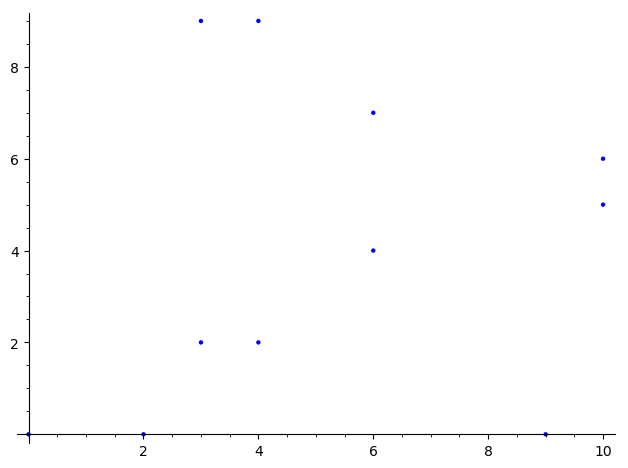

In [38]:
FF.plot()

Another example

In [41]:
E = EllipticCurve(GF(101), [1,0])

In [44]:
P = E.lift_x(0)
P

(0 : 0 : 1)

In [45]:
P.order()

2

In [46]:
J = E.isogeny(P)
EE = J.codomain()
EE

In (very) limited cases, Sage can compute the isogeny given the image curve and the degree

In [ ]:
JJ = E.isogeny(None, codomain=EE, degree=2)

In [54]:
J == JJ

True

## Your turn: exercices!

### Diffie-Hellman 

Implement the (naive) Diffie-Helman key exchange scheme with elliptic curves.

#### 1. Find a curve of prime order

Choose a prime $p$. Take curves at random over $𝔽_p$ until you find one with prime order.

**Suggestion:** For a start, take $p$ of ~60 bits. When your code works well enough you can try 160 bits (it may take a few minutes to find a curve)

#### 2. Implement the scheme

Write a function to sample secret keys, and a function to produce public keys. Perform the key exchnage and verify that Alice and Bob obtain the same key.

### ECM Factoring method

Implement Lenstra's factoring method. See the [lecture notes](https://arxiv.org/pdf/1711.04062.pdf), Section 5.

**Note:** Sage has limited support for curves over $ℤ/Nℤ$, just enough to implement ECM.

### Generating irreducible polynomials

Implement the Couveignes-Lercier method for generating irreducible polynomials. See the [lecture notes](https://arxiv.org/pdf/1711.04062.pdf), Section 8.

**Note:** Sage has limited support for curves over $ℤ/Nℤ$, just enough to implement ECM.